In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="2"

In [2]:
import numpy as np
import pylab as pl
from matplotlib import pyplot
from pykalman import KalmanFilter
from utils.sequences_treatment import *
from utils.linear_systems import *

In [3]:
kf=loadKF()

In [4]:
numberSamples=1
T=5

In [6]:
(objectives,observations,_)=sampleKFSequence(kf,T,numberSamples=numberSamples)
print(objectives.shape)
print(observations.shape)

(1, 5, 1)
(1, 5, 1)


In [7]:
sigma=randomSigma(T,numberSamples=numberSamples,p0=0)
observations_corrupted=corruptKFSequence(observations,sigma)

In [8]:
filtered_objectives, objective_covariances, filtered_states, state_covariances=KFFilterAll(kf,observations_corrupted)

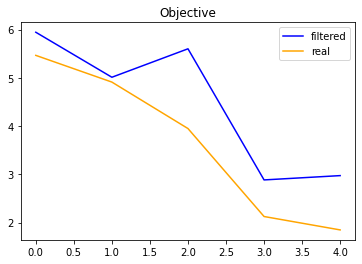

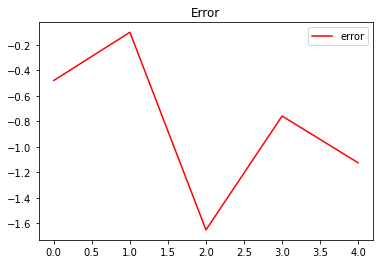

In [17]:
i=0
pyplot.title('Objective')
pyplot.plot(filtered_objectives[i,:], color='blue', label='filtered')
pyplot.plot(objectives[i,:], color='orange', label='real')
pyplot.legend()
pyplot.show()

pyplot.title('Error')
pyplot.plot(objectives[i,:]-filtered_objectives[i,:], color='red', label='error')
pyplot.legend()
pyplot.show()

In [18]:
filtered_state=None
filtered_state_covariance=None
for t in range(T):
    filtered_state,filtered_state_covariance,filtered_objective,filtered_objective_covariance=KFFilterOne(kf, observations_corrupted[0,t,:], state_mean=filtered_state, state_mean_covariance=filtered_state_covariance)
    print(filtered_state)

[ 6.06300179 -4.86955807]
[ 5.03968333 -4.96534274]
[ 5.61495576 -4.67263972]
[ 2.88694017 -5.48762827]
[ 2.97470166 -5.20739261]
